<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/SAS-in-Clinical-Trial/blob/main/B_L5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi della sopravvivenza.
# Le curve di sopravvivenza

L’analisi della sopravvivenza è un insieme di metodi statistici adatti allo studio dei tempi di accadimento di un evento.

Nell’analisi della sopravvivenza il piano di osservazione è longitudinale.

Si inizia a osservare un insieme di individui in un preciso istante nel tempo, e li si segue (follow-up) per un periodo, rilevando i tempi in cui gli eventi di interesse si verificano.

Per evento si intende un endpoint binario chiaramente definito.
Ad esempio: morte, infarto, prima recidiva di un tumore, diagnosi di diabete.
L’evento deve essere
- stabilito all'inizio dello studio
- definito in modo chiaro ed inequivocabile
- unico

Quando facciamo partire l’orologio?

L’origine temporale è definita dal verificarsi di un circostanza clinicamente non ambigua e ben individuabile.

Ad esempio: data della diagnosi di una malattia, data della randomizzazione in un trial clinico o dell’inizio del trattamento.

Il tempo trascorso tra l’origine temporale e il tempo in cui accade l’evento è una variabile numerica non negativa che può essere espressa in settimane, mesi, anni, ecc.

Esempio:

Sopravvivenza di 10 pazienti seguiti per 5 anni dopo la chirurgia

fig - 1+ 2


Se nel periodo di osservazione previsto dallo studio l’evento di interesse si
verifica, si registra il tempo in cui l’evento di interesse si è verificato.

Se l’evento non accade (dato censurato) si registra il tempo dell’ultima
osservazione.

Per ciascun soggetto, i dati di sopravvivenza si possono rappresentare con
una coppia di valori (t,d), dove t è il tempo all’evento o il tempo dell’ultima
osservazione (solitamente tempo dall’entrata nello studio), e dove d è
l’indicatore dell’accadimento dell’evento, (solitamente d=1 se l’evento di
interesse viene osservato, e d=0 se non viene osservato)
Per un campione di N individui: ($t_1, d_i$) i=1,2...N

- fig -3

## Dati censurati

I soggetti per i quali non si osserva l’evento di interesse durante il
periodo di osservazione vengono definiti censurati.

La presenza di dati censurati può essere dovuta al fatto che alcuni
soggetti:
1. non sviluppano l’evento nel periodo di osservazione dello studio
(censura amministrativa);
2. vengono persi al follow-up (ad es. non si presentano più alle visite
di controllo);
3. escono dallo studio per eventi differenti dall’evento di interesse.


fig - 4

Un metodo semplice per quantificare l’incidenza dell’evento di interesse nel gruppo in studio, tenendo conto dell’informazione fornita anche dai dati censurati, è di rapportare il totale degli eventi osservati al totale delle persone-tempo (sia per i soggetti censurati che per i non censurati):

totale eventi / totale persone-tempo = tasso di evento


Tasso di incidenza dell’evento: 4/40 annipersona=0.1 evento / anno:
interpretabile sotto l’assunto che il tasso annuale (nel gergo dell’analisi della sopravvivenza si parla di azzardo-hazard) sia costante nel tempo

## Tasso non costante
Tasso incidenza = 4/32.8=0.12 eventi per anno

In questa situazione, dove gli eventi si verificano tutti nel primo anno di osservazione, il tasso di incidenza annuale calcolato come tot eventi/tot anni-persona, non è una misura appropriata per descrivere l’incidenza del fenomeno.

Come possiamo descrivere l’incidenza dell’evento nel tempo, tendendo
conto dell’informazione su eventuali dati censurati e non assumendo un
tasso costante di evento?

Il metodo più utilizzato consiste nel rappresentare il complemento a 1 della
funzione di densità cumulativa (curva di incidenza cumulativa - IC) dei
tempi di accadimento dell’evento, cioè la curva di sopravvivenza:
S(t)=1-P(T≤t)=P(T>t)

## Curva di Sopravivenza
La curva di sopravvivenza S(t)= P(T>t) descrive la probabilità cumulativa
di sopravvivere all’evento nel tempo.

In assenza di dati censurati, S(t) è stimata semplicemente dalla proporzione di individui che non hanno ancora avuto l’evento al tempo t, rispetto al totale degli individui che entrano nello studio.

## Esempio senza censura

Supponiamo per ora di non avere dati censurati e di osservare, per 10
pazienti, i seguenti tempi di sopravvivenza (tutti i pazienti sperimentano
l’evento. In tabella i pazienti sono stati ordinati per tempo all’evento):

fig - 8

```
data NoCensor;
input Patient $ 1-9 Time Event;
cards;
John 1 1
Jess 2 1
Ann 3 1
Mary 4 1
Frank 5 1
Steven 6 1
Andy 7 1
Elizabeth 8 1
Joe 9 1
Kate 10 1
;
run;
proc univariate data=NoCensor;
var time;
cdf time; /*comando per ottenere la funzione di
distribuzione cumulativa*/
run;
```

Nel gergo dell’analisi della sopravvivenza, la funzione di distribuzione cumulativa dei tempi di accadimento è nota anche come funzione di
incidenza cumulativa.

In assenza di dati censurati, l’incidenza cumulativa al tempo t può essere
semplicemente stimata dal numero di eventi osservati al tempo t sul
totale dei soggetti a rischio di sperimentare l’evento all’inizio dello
studio (es: a 4 mesi ho osservato 4 eventi su 10, quindi IC=4/10=0.4)

IC(4) = 4/10 =0.4 (40%)

fig-9

Per ottenere il complemento a 1 della funzione di incidenza cumulativa (cioè la curva di sopravvivenza) è necessario utilizzare la procedura SAS LIFETEST, procedura chiave per rappresentare i dati di sopravvivenza.
 ```
 proc lifetest data=NoCensor
plots=survival((atrisk(outside atrisktick)=0 to 10 by 1);
time time;
run;
```

Per calcolare la funzione di sopravvivenza è possibile anche utilizzare la seguente strategia:
1) ordinare in senso crescente i tempi rilevati ($t_j$)
2) calcolare, in corrispondenza dei tempi in cui si verificano gli eventi, il numero di eventi dj e il numero di soggetti a rischio $n_j$.

fig 10



## Esempio con Censura:

Supponiamo ora che Steven e Joe abbandonino lo studio prima che si verifichi per loro l’evento (Steven al tempo 2.5, Joe al tempo 5.5). In questo caso il loro tempo di osservazione è censurato al momento dell’abbandono.

fig 11

Calcolare la funzione di sopravvivenza come semplice complemento a 1
della funzione di distribuzione cumulativa dei tempi di sopravvivenza, in
presenza di censure, non è più possibile: non conosciamo infatti per tutti i
soggetti il tempo in cui si verifica l’evento.

Se il motivo per cui Steven e Joe abbandonano lo studio non dipende dal loro stato di salute, e quindi dall’evento di interesse (censura non informativa), possiamo assumere che i pazienti che rimangono sotto osservazione possano ‘rappresentarli’ dopo l’abbandono.




## Stimatore di Kaplan-Meier

In questa situazione, torna utile la strategia per il calcolo della funzione di
sopravvivenza che abbiamo visto prima (in assenza di dati censurati questa formula è inutilmente più complessa rispetto al semplice calcolo del complemento a 1 della funzione di distribuzione cumulativa)
1. Ordinare in senso crescente i tempi rilevati - t_j
2. Calcolare, in corrispondenza dei tempi in cui si verificano gli eventi, il numero di eventi $d_j$ e il numero di soggetti a rischio $n_j$

$S(t_j) = \prod_{i=1}^j (\frac{n_i - d_i}{n_i})$
- j=1..J
- J =< N

Questa formula (sviluppata da Kaplan e Meier nel 1958) stima correttamente la
curva di sopravvivenza anche con dati censurati, in quanto tiene conto, nel calcolo della sopravvivenza al tempo t, del numero di soggetti che sono effettivamente a rischio di sviluppare l’evento. I soggetti censurati entrano nel conteggio degli “a rischio” di evento solo fino alla censura.

Questa è la curva di sopravvivenza stimata secondo gli assunti fatti prima,
utilizzando il metodo di K-M (vedremo poi come ottenerla in SAS).

- fir -12+ 13


Maggiore è il numero di censure osservate, maggiore è l’impatto che un
singolo evento ha nel far ‘scendere’ la curva.

Quando ci si trova con pochi soggetti rimasti nell’osservazione (non perché si sono verificati tanti eventi, ma perché si sono osservate tante censure), la stima della curva di sopravvivenza diventa poco affidabile, proprio perché un singolo evento può far scendere di molto la curva di sopravvivenza.

Per questo motivo è importante riportare anche gli intervalli di confidenza della stime delle probabilità di sopravvivenza.

```
data Censor;
input Patient $ 1-9 Time Event;
cards;
John 1 1
Jess 2 1
Steven 2.5 0
Ann 3 1
Mary 4 1
Frank 5 1
Joe 5.5 0
Andy 7 1
Elizabeth 8 1
Kate 10 1
;
run;

proc lifetest data=Censor
plots=survival(atrisk(outside atrisktick)=0 to 10 by 1);
time time*event(0);
run;
```

Per ottenere lo stimatore di KM, corretto per la presenza di censure, è
necessario specificare nel comando TIME della PROC LIFETEST, oltre al nome
della variabile che indica il tempo dell’evento, anche il nome della variabile che indica l’evento di interesse e, tra parentesi, il valore che identifica l’osservazione censurata (qui è la variable EVENT, codificata come: 0 ->censura, 1-> evento)

```
proc lifetest data=Censor
plots=survival(atrisk(outside atrisktick)=0 to 10 by 1 cl);
time time*event(0);
run;
```
- ```cl```- Opzione per visualizzare gli intervalli di confidenza al 95%
delle probabilità di sorpavvivenza

## Censura informativa:
Come anticipato, lo stimatore di KM è corretto (nel senso che stima in
modo non distorto la vera funzione di sopravvivenza) sotto l’ipotesi che
il tempo di censura e quello dell’evento siano tra loro indipendenti.
La causa della censura dell’osservazione non deve quindi essere
associata all’evento in studio (censura non informativa).

- Esempi di censura informativa:

Abbandono dei pazienti sottoposti alla sperimentazione di un farmaco
in un trial clinico per peggioramento delle condizioni cliniche. I pazienti
censurati non hanno la stessa prognosi di quelli ancora sotto
osservazione (i pazienti che rimangono non rappresentano quindi
anche quelli che hanno abbandonato)

## Sopravvivenza al tempo t

Dalla curva di sopravvivenza S(t) è possibile stimare la sopravvivenza
attesa a uno specifico tempo.

La figura rappresenta la sopravvivenza di una coorte di pazienti con tumore del fegato trattati con radioterapia ablativa. La sopravvivenza stimata a 1 anno è 0.46.

fig 15

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0177793


## Sopravivenza mediana
Poiché i tempi di sopravvivenza tendono ad avere andamenti non simmetrici (solitamente asimmetrici a destra), si preferisce riportare la mediana di sopravvivenza invece che la media.

La media infatti è spesso più alta della mediana, perché influenzata dai (pochi) soggetti che sopravvivono a lungo.

La mediana è più adatta a sintetizzare la prognosi di un paziente.

La sopravvivenza mediana è il tempo t tale che S(t)=0.5

L’output della PROC LIFETEST riporta i quartili della distribuzione dei
tempi di sopravvivenza, tra cui la mediana di sopravvivenza (50°
percentile).

Può capitare che, in coorti in cui l’evento di interesse non si verifica con
elevata intensità durante il periodo di osservazione, non sia possibile
stimare la mediana di sopravvivenza.


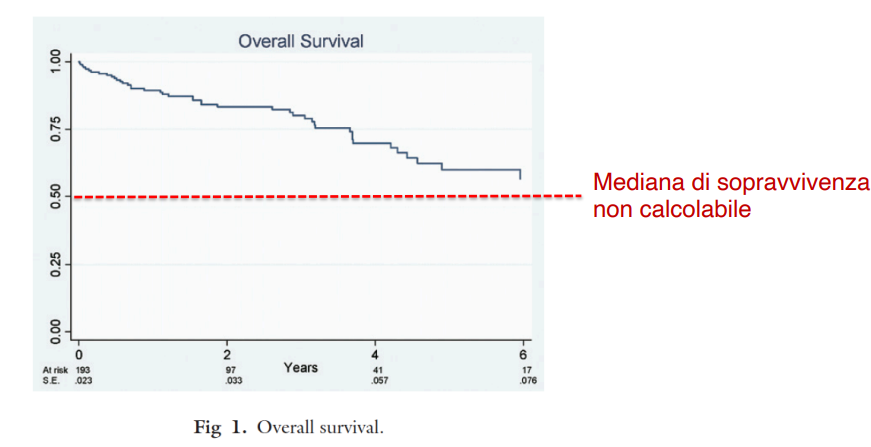![image.png](
  
)


mportanza dello stimatore di KM nella letteratura biomedica

Kaplan, E. L. & Meier, P. Nonparametric estimation from incomplete
observations. Journal of the American Statistical Association 53, 457–481
(1958).
the most cited paper in medical statistics - #11 in all science publications

# 5.2. Confronto tra curve di sopravvivenza

Come confrontare la sopravvivenza nel tempo tra i due gruppi?

Sarebbe arbitrario eseguire il confronto in un singolo istante nel tempo, ad esempio confrontando le sopravvivenze nei due gruppi a un anno.

Sarebbe invece opportuno confrontare l’andamento globale delle due curve.


## Dataset di esempio
Confronto la sopravvivenza di due gruppi di pazienti con leucemia (trattati vs
placebo).

Evento: recidiva

Tempo: tempo in remissione (settimane)

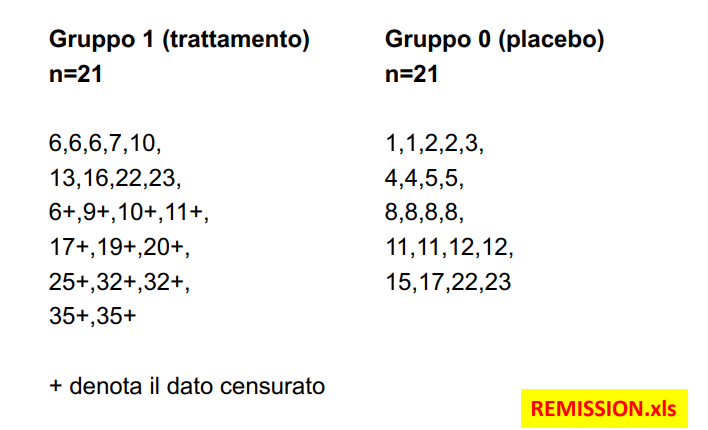

```
PROC LIFETEST DATA=REMISSION PLOTS=SURVIVAL(ATRISK(OUTSIDE ATRISKTICK)=0 TO 36 BY 6);
TIME TIME*STATUS(0);
STRATA TREAT;
RUN;
```

Come valutare l’ipotesi nulla di uguaglianza tra le due curve?

## Test del confronto tra due curve
H0: nessuna differenza tra le S(t), ad ogni t la sopravvivenza stimata nei trattati è uguale a quella del gruppo di controllo

HA: differenze delle S(t) nei due gruppi

Il test statistico si basa sul confronto tra il numero di eventi osservati in un
gruppo rispetto al numero di eventi attesi nello stesso gruppo, calcolata sotto
l’ipotesi nulla di sopravvivenza identica tra gruppi

Gli attesi sono calcolati secondo la seguente procedura:
1. si ordinano i tempi di accadimento degli eventi ($t_j$), indipendentemente dal gruppo in cui si verifica l’evento.
2. Si riportano poi, per ogni $t_j$, gli eventi osservati nel gruppo 1 e nel gruppo 0, e i corrispondenti pazienti a rischio (tenendo conto anche di eventuali pazienti censurati)

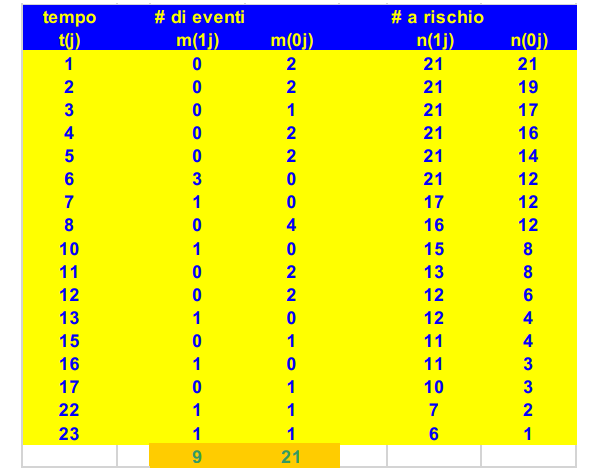

3. si calcolano gli eventi attesi nel gruppo 1 e nel gruppo 0 ($e_{1j}$ ed $e_{0j}) sotto l’ipotesi nulla di sopravvivenza uguale nei due gruppi di trattamento:

$e_{1j}= (\frac{n_{1j}}{n_{1j}+ n_{0j}})* (m_{1j}+ m_{0j})$

$e_{0j}= (\frac{n_{0j}}{n_{1j}+ n_{0j}})* (m_{1j}+ m_{0j})$

- proporzione di persone a rischio

- di eventi in entrambe i gruppi

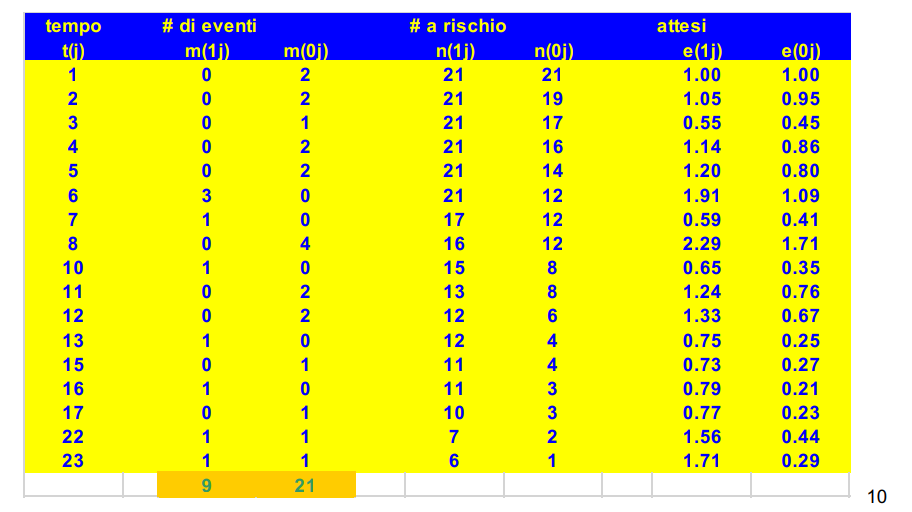

4. ) si calcolano le differenze tra gli eventi osservati e gli eventi attesi nei due gruppi in ognuno dei tempi in cui accadono gli eventi, e si fa la sommatoria delle differenze sia nel gruppo 1 che nel gruppo 0
- k = numero di tempi diversi in cui accade un evento

$O_j - E_j = \sum_{j=1}^k (m_{ij} - e_{ij})$

sia per i=0 che per i=1

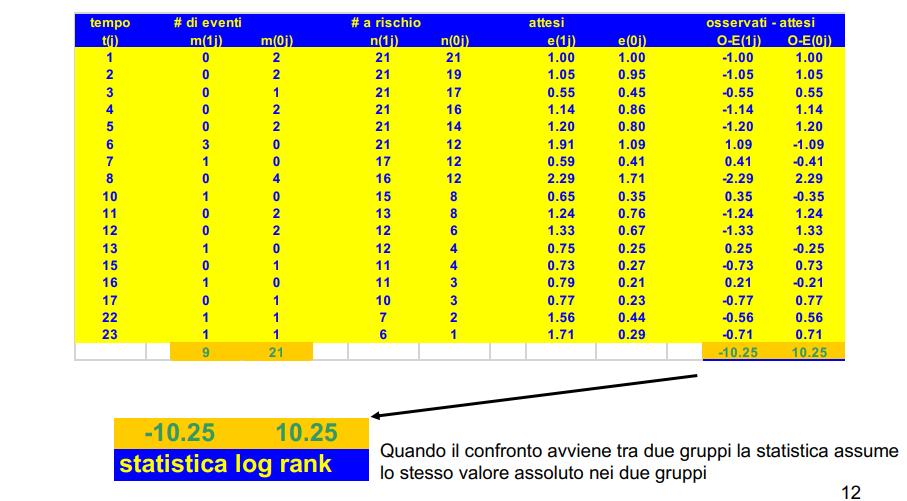

5. ) la statistica log-rank al quadrato, divisa per la sua varianza, si distribuisce, sotto l’ipotesi nulla, come una statistica chi quadrato con un grado di libertà.

$\frac{(O_i - E_i)^2}{Var[O_i - E_i]} \sim \chi^2$ - con 1 gdl sotto $H_0$

$Var(O_i - E_i) = \sum_j \frac{n_{1j}.n_{0j}(n_{1j} + m_{0j})(n_{1j}+ n_{0j} - m_{1j}- m_{0j})}{(n_{ij} + n_{0j})^2(n_{ij} + n_{0j}-1)}$

6. Tanto maggiore è il valore della statistica test, tanto minore è l’evidenza a favore di $H_0$. Possiamo quindi calcolare il valore del p-value associato all’ipotesi nulla.

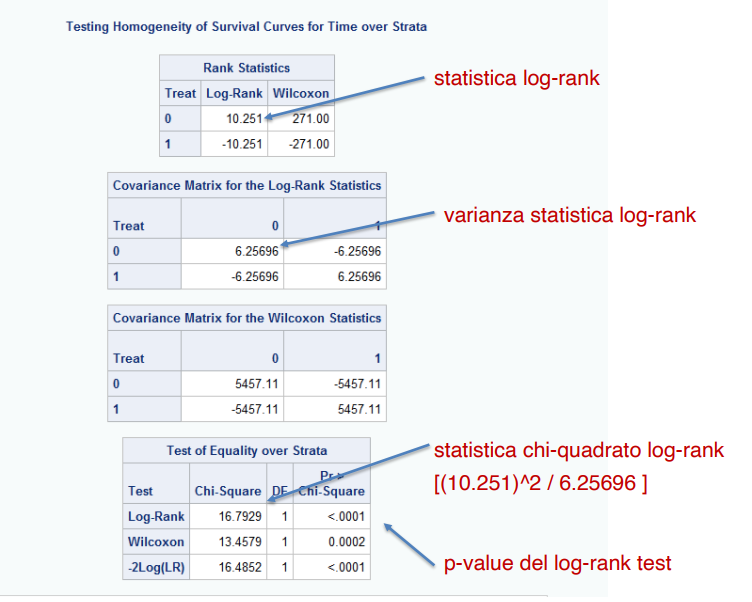


## Test log Test Log -rank-Rank per il confronto tra due curve di sopravvivenza per il confronto tra due curve di sopravvivenza

```
PROC LIFETEST DATA=REMISSION PLOTS=SURVIVAL(ATRISK(OUTSIDE ATRISKTICK)=0 TO 36
BY 6 TEST) ;
TIME TIME*STATUS(0);
STRATA TREAT;
RUN;
```

Con l’opzione TEST è possibile visualizzare direttamente nel grafico il valore del p-value associato al log-rank test

- G > 2 (numero di curve di sopravvivenza poste a confronto)
- $H_0$ = le curve sono uguali in ogni gruppo
- Il calcolo degli attesi è simile a quello già definito per il confronto tra due gruppi. Si complica il calcolo della statistica test, poiché implica la definizione della matrice di varianze e covarianze delle statistiche log-rank (calcolata comunque in SAS)

Statistica test log-rank ~ $\chi^2$ con G-1 g.d.l. sotto $H_0$



# 5.3. Analisi della sopravvivenza. Modelli parametrici a rischi proporzionali per la stima dell’effetto di un trattamento

## Limiti del log-rank test
Non si ottiene una stima quantitativa dell’effetto del trattamento.

Sarebbe utile sintetizzare l’effetto di un trattamento in termini relativi,
stimando di quanto diminuisce il tasso (hazard) di evento nel gruppo
trattato rispetto al gruppo di controllo (stima dell’hazard ratio).

La stima dell’hazard (o rate) ratio è ottenibile da modelli di regressione.

L’assunto implicito che si fa quando si stima un unico hazard ratio è che il
rapporto tra i tassi nei gruppi posti a confronto rimanga costante nel corso
dell’osservazione (proportional hazard assumption)

## Dataset di esempio:
Confronto la sopravvivenza di due gruppi di pazienti con leucemia (trattati vs
placebo).

Evento: recidiva

Tempo: tempo in remissione (settimane)

## Confronto tra tassi
Consideriamo il numero di eventi nel gruppo trattato e nel gruppo placebo,
e calcoliamo anche i totali delle persone tempo osservate (in settimane)
nei due gruppi

```
PROC MEANS DATA=REMISSION SUM;
VAR STATUS TIME;
CLASS TREAT;
RUN;
```

- 21/181 = 0.115 - tasso settimanale del gr0

0.025/0.115 - 0.22 RR- Rate ratio

9/359 = 0.025 - tasso settimanale del gruppo 1 - trattati

## Modello di regressione di Poisson

Anche se dal punto di vista individuale la v.c. evento può assumere solo valore 0 o 1 (quindi non è una variabile conteggio), dal punto di vista aggregato il numero di eventi osservati D nel totale delle persone-tempo T può essere considerata la realizzazione di una v.c. di Poisson con tasso di evento nell’unità di tempo $\lambda$

Come nel caso degli eventi multipli per paziente, possiamo far dipendere il log del tasso $\lambda$ da da una combinazione lineare di covariate, e scrivere un modello di regressione di Poisson:
$log \theta_i = log T_i + log \lambda_i $ con logT variabile di offset

e con $log \lambda_i = b`.x_i$

Considerando la covariata trattamento (0: placebo, 1: trattato), il modello di
regressione diventa: $log \lambda_i = \alpha + \beta treat$

con $\alpha$ che misura il logaritmo del tasso mensile nel gruppo placebo (treat=0) e $\alpha + \beta$ che misura il logaritmo del tasso mensile nel gruppo trattato (treat=1)


Modello di regressione di Poisson

```
DATA AGGREGATE;
INPUT TREAT COUNT PERSONWEEK;
LOGPW=LOG(PERSONWEEK);
CARDS;
0 21 182
1 9 359
;
RUN;
PROC GENMOD DATA=AGGREGATE;
CLASS TREAT(REF="0") / PARAM=REF;
MODEL COUNT=TREAT / OFFSET=LOGPW D=POISSON LINK=LOG;
RUN;

DATA REMISSION1;
SET REMISSION;
LOGPW=LOG(TIME);
RUN;
PROC GENMOD DATA=REMISSION1;
CLASS TREAT(REF="0") / PARAM=REF;
MODEL STATUS=TREAT / OFFSET=LOGPW D=POISSON LINK=LOG;
RUN;
```

Non è tuttavia necessario aggregare i dati in un data step per la covariata, o le covariate di interesse.

La PROC GENMOD fa da sola questa operazione, partendo dal dataset
originale con i dati individuali.

Basta specificare, come variabile dipendente, la variabile dicotoma che
indica l’evento e ricordarsi di specificare la variabile di offset.

Come interpretare i risultati?
- exp[ −2.16] = 0.115 → tasso settimanale di recidive nel gruppo 0 (PLACEBO)
exp [−2.16 − 1.53] = 0.025 → tasso settimanale di recidive nel gruppo 1 (TRATTATO)
Il rapporto tra tassi è uguale a
exp[ −1.53] = 0.22 (IC 95%: exp[ −2.31] − exp[ −0.75] = 0.10 − 0.47)



# 5.4. Analisi della sopravvivenza. Modello di Cox per la stima dell’effetto di un trattamento

